Thnaks Aman Kharwal I learn from this notebook

## **importing Dataset**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#Prophet :producing high-quality forecast data
from fbprophet import Prophet

## Reading Dataset

In [2]:
data = pd.read_csv("../input/amazon-stock-5-years/all_stocks_5yr.csv")
data.tail(20)

,date,open,high,low,close,volume,Name
619020,2018-01-10,74.58,74.80,73.280,73.91,2257464,ZTS
619021,2018-01-11,74.05,74.68,73.720,74.59,1629279,ZTS
619022,2018-01-12,74.91,75.69,74.770,75.39,1915669,ZTS
619023,2018-01-16,76.06,76.40,75.210,75.54,2599094,ZTS
619024,2018-01-17,75.81,77.03,75.390,76.77,2769587,ZTS
619025,2018-01-18,76.65,76.65,75.850,76.33,2588995,ZTS
619026,2018-01-19,76.69,76.91,76.220,76.62,4829602,ZTS
619027,2018-01-22,76.67,77.58,76.620,77.48,4195103,ZTS
619028,2018-01-23,77.30,78.32,76.970,77.59,2264132,ZTS
619029,2018-01-24,78.16,78.51,77.600,78.33,2585326,ZTS


In [3]:
# Here I will replace the column name from name to ticks:
# For this simple Facebook Prophet Model tutorial with Python, I’ll analyze the Amazon stock and see what the trend for the near future of that stock will look like based on past stock prices:
data = data.rename(columns = {'Name' : 'Ticks'})
data.head()

,date,open,high,low,close,volume,Ticks
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
amzn = data.loc[data['Ticks'] == 'AMZN']
amzn.head()

,date,open,high,low,close,volume,Ticks
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


## create a copy

In [5]:

amzn_data = amzn.copy()

# change our datatype to datetime


In [6]:
amzn_data.loc[:, 'date'] = pd.to_datetime(amzn.loc[:, 'date'], format= "%Y/%m/%d")

## Steps

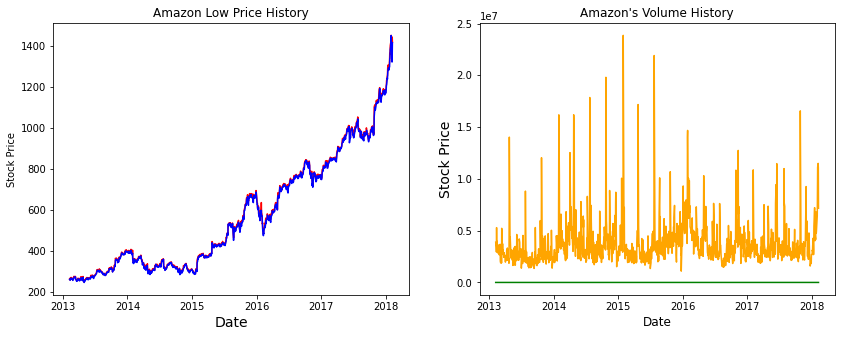

In [7]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn_data["date"], amzn_data["close"], color= "red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax2.plot(amzn_data["date"], amzn_data["high"], color="green")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon High Price History")

#f,(ax1,ax2)= plt.subplots(1,2,figsize =(14,8))

# third subplot

ax1.plot(amzn_data["date"], amzn_data["low"],color='blue')
ax1.set_xlabel("Date", fontsize= 14)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# fourth subplot
ax2.plot(amzn_data['date'],amzn_data["volume"], color= 'orange')
ax2.set_xlabel("Date")
ax2.set_ylabel("Stock Price", fontsize= 14)
ax2.set_title("Amazon's Volume History")
plt.show()

In [8]:

#Drop the columns
ph_data = amzn_data.drop(['open', 'high', 'low', 'volume', 'Ticks'], axis= 1)
ph_data.rename(columns= {'close': 'y', 'date': 'ds'}, inplace = True)
ph_data.head()

,ds,y
46387,2013-02-08,261.95
46388,2013-02-11,257.21
46389,2013-02-12,258.70
46390,2013-02-13,269.47
46391,2013-02-14,269.24


In [9]:
m= Prophet()
m.fit(ph_data)
# create future date
future_prices = m.make_future_dataframe(periods= 365)
#future_prices.head()


## Predict Price

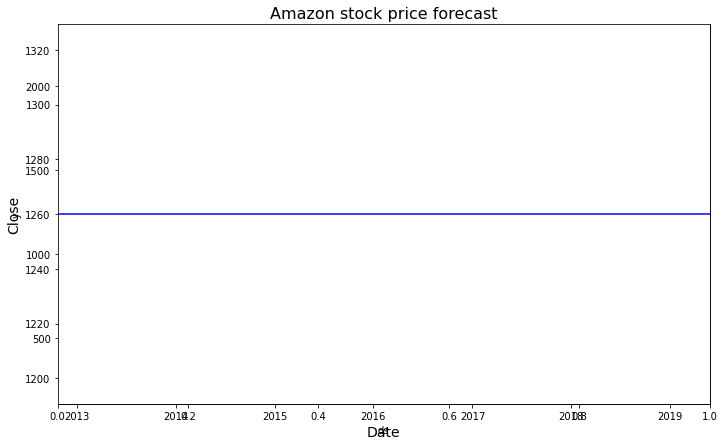

In [10]:



forecast = m.predict(future_prices)

import matplotlib.dates as mdates

#Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)

trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 4, 7)
pointing_arrow1 = mdates.date2num(pointing_arrow)



fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon stock price forecast", fontsize= 16)
ax1.set_xlabel("Date", fontsize= 14)
ax1.set_ylabel("Close", fontsize= 14)




#Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1, 1700),
            arrowprops = dict(facecolor='#ff7f50', shrink=0.1),)

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy= (trend_date1, 1225), xytext=(trend_date1, 950),
            )

ax1.axhline(y=1260, color='b', linestyle= '-')
plt.show()

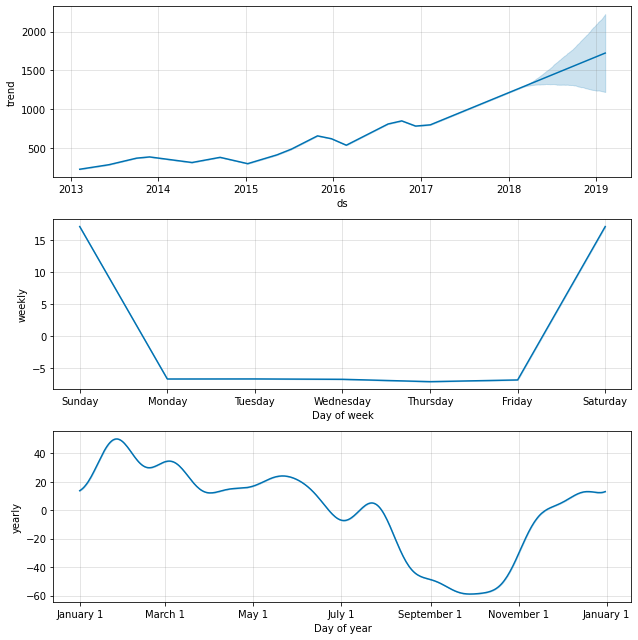

In [11]:
fig2 = m.plot_components(forecast)
plt.show()

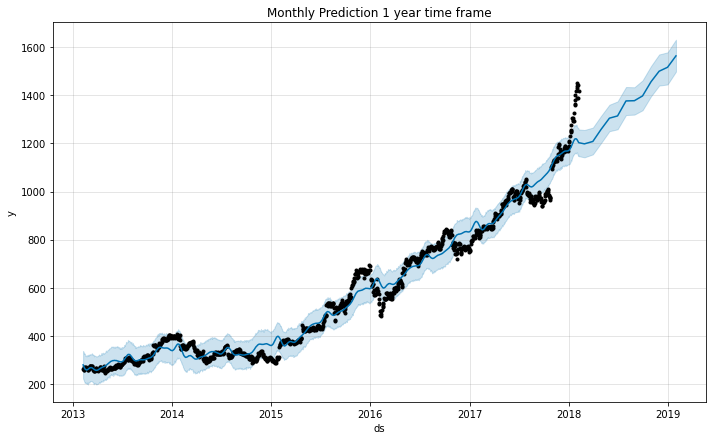

In [12]:

m = Prophet(changepoint_prior_scale = 0.01).fit(ph_data)
future = m.make_future_dataframe(periods = 12, freq= 'M')
fcst = m.predict(future)
fig= m.plot(fcst)
plt.title("Monthly Prediction 1 year time frame")

plt.show()